In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [2]:
def check_df(dataframe: pd.DataFrame):
    print("########## Types ##########")
    print(dataframe.dtypes)
    print("########## Head ##########")
    print(dataframe.head())
    print("########## Tail ##########")
    print(dataframe.tail())
    print("########## NA ##########")
    print(dataframe.isnull().sum())
    print("########## Description ##########")
    print(dataframe.describe().T)
    print("########## Info ##########")
    print(dataframe.info())


In [3]:
df = pd.read_csv("turkey_earthquakes(1915-2021).csv", delimiter=";")
check_df(df)

########## Types ##########
No               int64
Deprem Kodu    float64
Olus tarihi     object
Olus zamani     object
Enlem          float64
Boylam         float64
Derinlik       float64
xM             float64
MD             float64
ML             float64
Mw             float64
Ms             float64
Mb             float64
Tip             object
Yer             object
dtype: object
########## Head ##########
   No   Deprem Kodu Olus tarihi  Olus zamani    Enlem   Boylam  Derinlik   xM   MD   ML   Mw   Ms   Mb Tip                                             Yer
0   1  2.021010e+13  2021.01.01  16:36:21.41  35.9273  27.8658      26.1  3.9  0.0  3.9  3.7  0.0  0.0  Ke                           RODOS ADASI (AKDENIZ)
1   2  2.020120e+13  2020.12.31  00:51:27.94  37.8435  26.7775       8.0  3.8  0.0  3.8  3.7  0.0  0.0  Ke                                      EGE DENIZI
2   3  2.020120e+13  2020.12.30  18:45:12.79  36.4918  28.7092       5.0  3.9  0.0  3.7  3.9  0.0  0.0  Ke               

In [4]:
def richter(x):
    if x == 0:
        return None 
    elif x < 2.0:
        return "MICRO"
    elif x < 4.0:
        return "MINOR"
    elif x < 5.0:
        return "LIGHT"
    elif x < 6.0:
        return "MODERATE"
    elif x < 7.0:
        return "STRONG"
    elif x < 8.0:
        return "MAJOR"
    elif x < 9.0:
        return "GREAT"
    elif x >= 9.0:
        return "GREATER"
    else:
        return "NO_RISK"

In [5]:
df["Richter Olcegi"] = df["ML"].apply(lambda x: richter(x))

<Axes: xlabel='Richter Olcegi'>

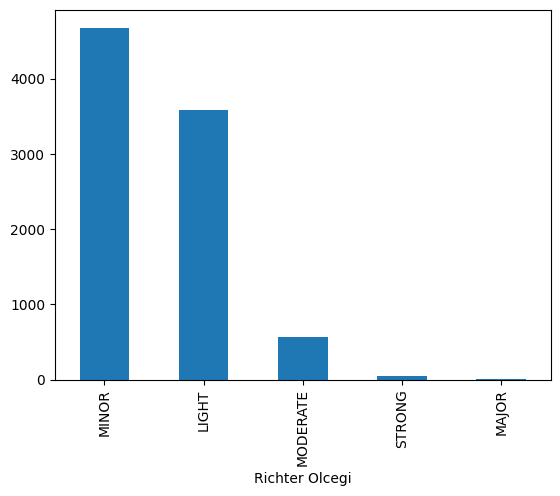

In [6]:
df["Richter Olcegi"].value_counts().plot.bar()

In [7]:
print(df["Olus zamani"].max())
for i in range(0, len(df)):
    if float(df['Olus zamani'][i][6:]) >= 60:
        df = df.drop(i)
df = df.reset_index(drop=True)

23:59:57.60


In [8]:
df["Olus zamani"] = df['Olus zamani'].str.split('.').str[0]
df["Olus zamani"] = df["Olus zamani"] + " " + df["Olus tarihi"]
df["Olus zamani"] = pd.to_datetime(df["Olus zamani"])
df = df.drop("Olus tarihi", axis=1)
df = df.drop(["No", "Deprem Kodu", "Tip"], axis=1)
check_df(df)

########## Types ##########
Olus zamani       datetime64[ns]
Enlem                    float64
Boylam                   float64
Derinlik                 float64
xM                       float64
MD                       float64
ML                       float64
Mw                       float64
Ms                       float64
Mb                       float64
Yer                       object
Richter Olcegi            object
dtype: object
########## Head ##########
          Olus zamani    Enlem   Boylam  Derinlik   xM   MD   ML   Mw   Ms   Mb                                             Yer Richter Olcegi
0 2021-01-01 16:36:21  35.9273  27.8658      26.1  3.9  0.0  3.9  3.7  0.0  0.0                           RODOS ADASI (AKDENIZ)          MINOR
1 2020-12-31 00:51:27  37.8435  26.7775       8.0  3.8  0.0  3.8  3.7  0.0  0.0                                      EGE DENIZI          MINOR
2 2020-12-30 18:45:12  36.4918  28.7092       5.0  3.9  0.0  3.7  3.9  0.0  0.0                           

In [9]:
df['Mw'] = df["Mw"].interpolate()
df["Mw"] = df["Mw"].round(1)

In [10]:
for i in df["Yer"]:
  if "?" in i:
    print(i)

ISKENDERUN K?RFEZI (AKDENIZ)
ABDULLAH-KARGI (?ORUM) [South East  2.0 km]
ASAGIDOLAYLAR-SIMAV (K?TAHYA) [South East  2.0 km]
YUKARIDOLAYLAR-SIMAV (K?TAHYA) [  2.09 km]
T?RKiYE-iRAN SINIR B?LGESi
TOKUL-ASLANAPA (K?TAHYA) [North West  0.6 km]
T?RKiYE-iRAN SINIR B?LGESi
SiDE A?IKLARI-ANTALYA (AKDENiZ)
T?RKiYE-iRAN SINIR B?LGESi
G?KOVA K?RFEZi (AKDENiZ)
CANDARLI K?RFEZI (EGE DENIZI)
KARACAOREN-SIMAV (K?TAHYA) [North East  0.9 km]
SOGUT-SIMAV (K?TAHYA) [North East  2.5 km]
G?KOVA K?RFEZi (AKDENiZ)
ABIDE A?IKLARI-?ANAKKALE (EGE DENIZI)
SAROS K?RFEZi (EGE DENiZi)
KEMALLI-SUNGURLU (?ORUM) [North East  0.7 km]
SOGUT-SIMAV (K?TAHYA) [South West  2.1 km]
VAN G?L?
HASANHACI-ORTA (?ANKIRI) [South West  2.4 km]
MERKEZ-ALTINTAS (K?TAHYA) [North West  2.5 km]
BOZBURUN A?IKLARI-MUGLA (AKDENIZ)
CANDARLI K?RFEZi (EGE DENiZi)
T?RKiYE-iRAN SINIR B?LGESi
T?RKIYE-IRAN SINIR B?LGESI
G?KOVA K?RFEZI (AKDENIZ)
G?RCiSTAN
CANDARLI K?RFEZi (EGE DENiZi)
BOZBURUN A?IKLARI-MUGLA (AKDENIZ)
T?RKIYE-IRAN SINIR B?LGESI
T?R

In [11]:
yer = df["Yer"].values
tr_char_err = []
for i in range(len(yer)):
  if "(" in yer[i]:
    start = yer[i].find("(") + 1
    end = yer[i].find(")")
    yer[i] = yer[i][start:end]
  elif"[" in yer[i]:
    yer[i] = yer[i].split("[")[0]
  if "?" in yer[i]:
    tr_char_err.append(yer[i])


In [12]:
print(set(tr_char_err))

{'VAN G?L?', 'KIBRIS-G?ZELYURT', 'KARAB?K', 'T?RKIYE-SURIYE SINIR B?LGESI', 'T?RKIYE-ERMENISTAN SINIR B?LGESI', 'KIBRIS-KILI?ASLAN', 'KIBRIS-Z?MR?TK?Y', 'G?RCiSTAN', '?ORUM', 'KUS G?L?', 'KIBRIS-SADRAZAMK?Y', 'G?RCISTAN', 'ULUBAT G?L?', 'T?RKiYE-IRAK SINIR B?LGESi', 'K?TAHYA', 'T?RKiYE-iRAN SINIR B?LGESi', '?ANKIRI', 'T?RKIYE-IRAK SINIR B?LGESI', 'T?RKIYE-IRAN SINIR B?LGESI', '?ANAKKALE'}


In [13]:
yer = pd.DataFrame(yer)
yer.columns = ["Yer"]
tr_char_replace = {
  'T?RKIYE-SURIYE SINIR B?LGESI': 'TURKIYE-SURIYE SINIR BOLGESI',
  'T?RKIYE-IRAN SINIR B?LGESI': 'TURKIYE-IRAN SINIR BOLGESI',
  '?ANKIRI': 'CANKIRI',
  'KIBRIS-G?ZELYURT': 'KIBRIS-GUZELYURT',
  '?ANAKKALE': 'CANAKKALE',
  'T?RKiYE-iRAN SINIR B?LGESi': 'TURKIYE-IRAN SINIR BOLGESI',
  'T?RKIYE-IRAK SINIR B?LGESI': 'TURKIYE-IRAK SINIR BOLGESI',
  'KUS G?L?': 'KUS GOLU',
  '?ORUM': 'CORUM',
  'T?RKIYE-ERMENISTAN SINIR B?LGESI': 'TURKIYE-ERMENISTAN SINIR BOLGESI',
  'KIBRIS-Z?MR?TK?Y': 'KIBRIS-ZUMRUTKOY',
  'G?RCISTAN': 'GURCISTAN',
  'KARAB?K': 'KARABUK',
  'K?TAHYA': 'KUTAHYA',
  'ULUBAT G?L?': 'ULUBAT GOLU',
  'T?RKiYE-IRAK SINIR B?LGESi': 'TURKIYE-IRAK SINIR BOLGESI',
  'KIBRIS-SADRAZAMK?Y': 'KIBRIS-SADRAZAMKOY',
  'VAN G?L?': 'VAN GOLU',
  'KIBRIS-KILI?ASLAN': 'KIBRIS-KILICASLAN',
  'G?RCiSTAN': 'GURCISTAN'
}
yer["Yer"] = yer["Yer"].replace(tr_char_replace)
df["Yer"] = yer
df["Yer"] = df["Yer"].str.lower()
df["Yer"].value_counts()

Yer
akdeniz                            4254
ege denizi                         1405
van                                 855
mugla                               719
kutahya                             688
                                   ... 
turkiye-gurcistan sinir bolgesi       1
iran-turkiye sinir bolgesi            1
turkiye-bulgaristan siniri            1
iran-irak siniri                      1
ardahan                               1
Name: count, Length: 127, dtype: int64

In [14]:
# Kategorik ve Numerik Sutunlar:
cat_cols = [col for col in df if df[col].dtypes in ["category", "object", "bool"]]
num_but_cat = [col for col in df if df[col].dtypes in ["int", "float"] and df[col].nunique() < 10]
cat_but_car = [col for col in df if df[col].dtypes in ["category", "object", "bool"] and df[col].nunique() > 20]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]
print("Kategorik")
print(cat_cols)
print("Kardinal")
print(cat_but_car)
# Kategorik Veri yok

Kategorik
['Richter Olcegi']
Kardinal
['Yer']


In [15]:
num_cols = [col for col in df.columns if df[col].dtypes in ['int', 'float']]
num_cols = [col for col in num_cols if col not in cat_cols]
print('Numerik')
print(num_cols)

Numerik
['Enlem', 'Boylam', 'Derinlik', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb']


In [16]:
def num_summary(df: pd.DataFrame, numerical_cols, plot=False):
    print(df[numerical_cols].describe().T)
    if plot:
        df[numerical_cols].hist()
        plt.xlabel(numerical_cols)
        plt.ylabel(numerical_cols)
        plt.show(block=True)

In [17]:
for col in num_cols:
  num_summary(df, col)

count    17369.000000
mean        38.087369
std          1.639486
min         35.000000
25%         36.810000
50%         38.230000
75%         39.230000
max         41.998200
Name: Enlem, dtype: float64
count    17369.000000
mean        32.077330
std          5.836212
min         26.000000
25%         27.550000
50%         29.380000
75%         36.323500
max         44.999200
Name: Boylam, dtype: float64
count    17369.000000
mean        15.551500
std         21.438279
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max        199.000000
Name: Derinlik, dtype: float64
count    17369.000000
mean         3.982665
std          0.542451
min          3.500000
25%          3.600000
50%          3.800000
75%          4.200000
max          7.900000
Name: xM, dtype: float64
count    17369.000000
mean         1.939323
std          2.014586
min          0.000000
25%          0.000000
50%          0.000000
75%          3.700000
max          7.400000
Name: M

In [18]:
def cat_summary(df: pd.DataFrame, col_name: str, plot=False):
    if df[col_name].dtype == "bool":
        df[col_name] = df[col_name].astype(int)
        perc = 100 * df[col_name].value_counts() / len(df)
        print(pd.DataFrame({col_name: df[col_name].value_counts(),
                            "Ratio": perc}))
        if plot:
            sns.countplot(x=df[col_name], data=df)
            plt.show(block=True)
    else:
        perc = 100 * df[col_name].value_counts() / len(df)
        print(pd.DataFrame({col_name: df[col_name].value_counts(),
                            "Ratio": perc}))
        if plot:
            sns.countplot(x=df[col_name], data=df)
            plt.show(block=True)

In [19]:
for col in cat_cols:
    cat_summary(df, col)

                Richter Olcegi      Ratio
Richter Olcegi                           
MINOR                     4681  26.950314
LIGHT                     3579  20.605677
MODERATE                   564   3.247164
STRONG                      50   0.287869
MAJOR                        5   0.028787


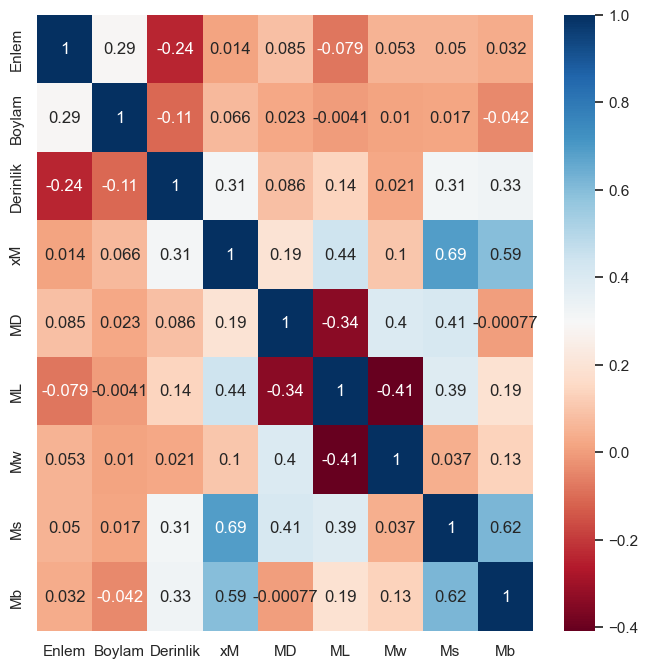

In [20]:
corr = df[num_cols].corr()
sns.set(rc={'figure.figsize': (8, 8)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

<Axes: >

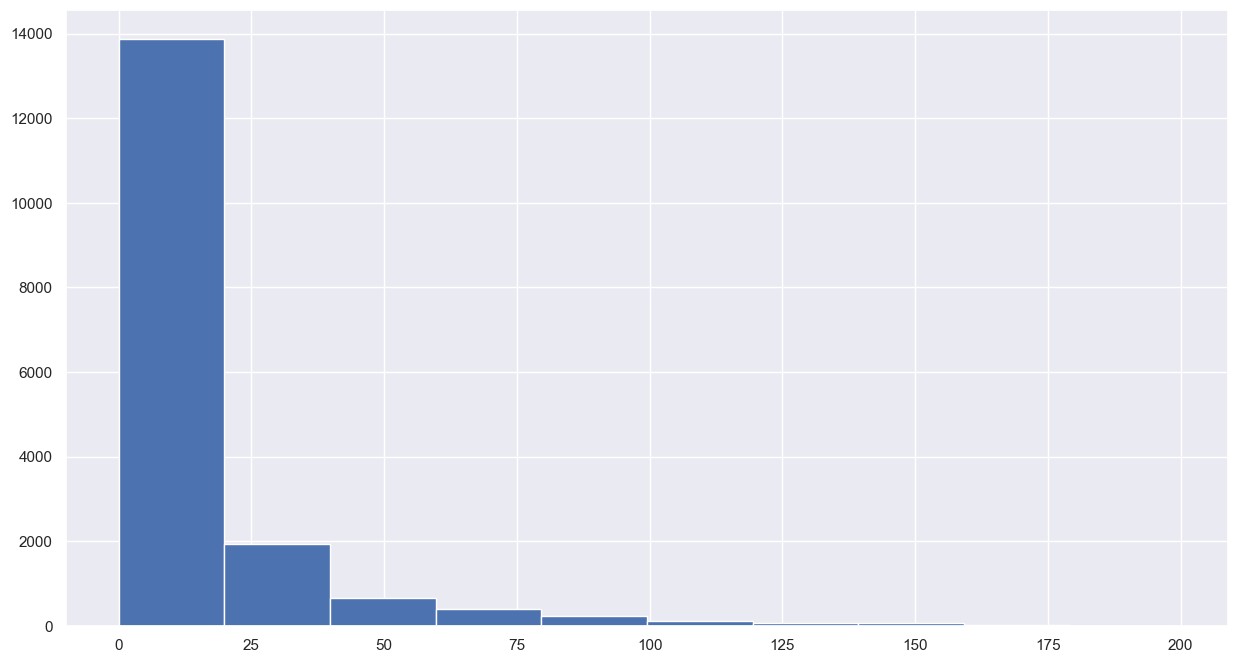

In [21]:
df["Derinlik"].hist(figsize=(15,8))

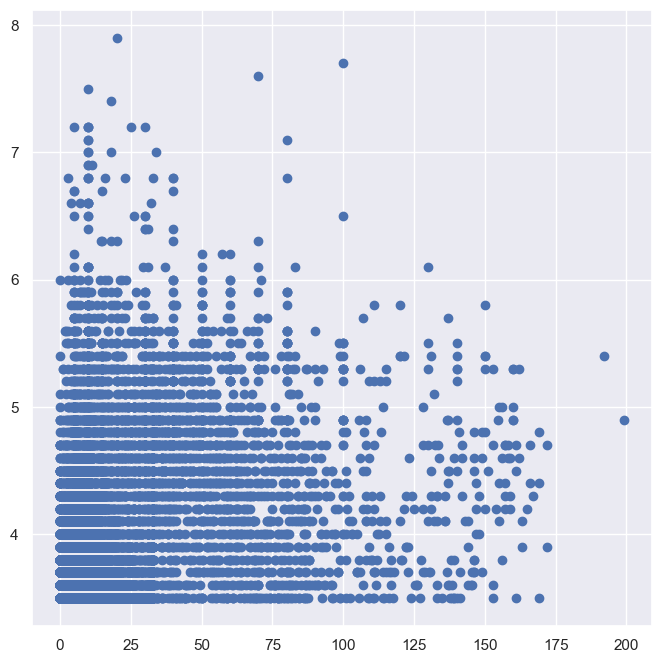

In [22]:
plt.scatter(df["Derinlik"], df["xM"])

In [23]:
eq = df[(df["xM"] > 3.7)]
px.scatter_mapbox(eq, lat="Enlem", lon="Boylam", color="xM", hover_name="xM", hover_data=["xM", "Mw", "ML", "Yer"], mapbox_style="carto-positron")

![](https://www.derszamani.net/wp-content/uploads/2017/03/p14-1.png "a title")


In [24]:
eq = df[(df["xM"] > 6)]
px.scatter_mapbox(eq, lat="Enlem", lon="Boylam", color="xM", hover_name="xM", hover_data=["xM", "Mw", "ML", "Yer"], mapbox_style="carto-positron")

<Axes: xlabel='Yer'>

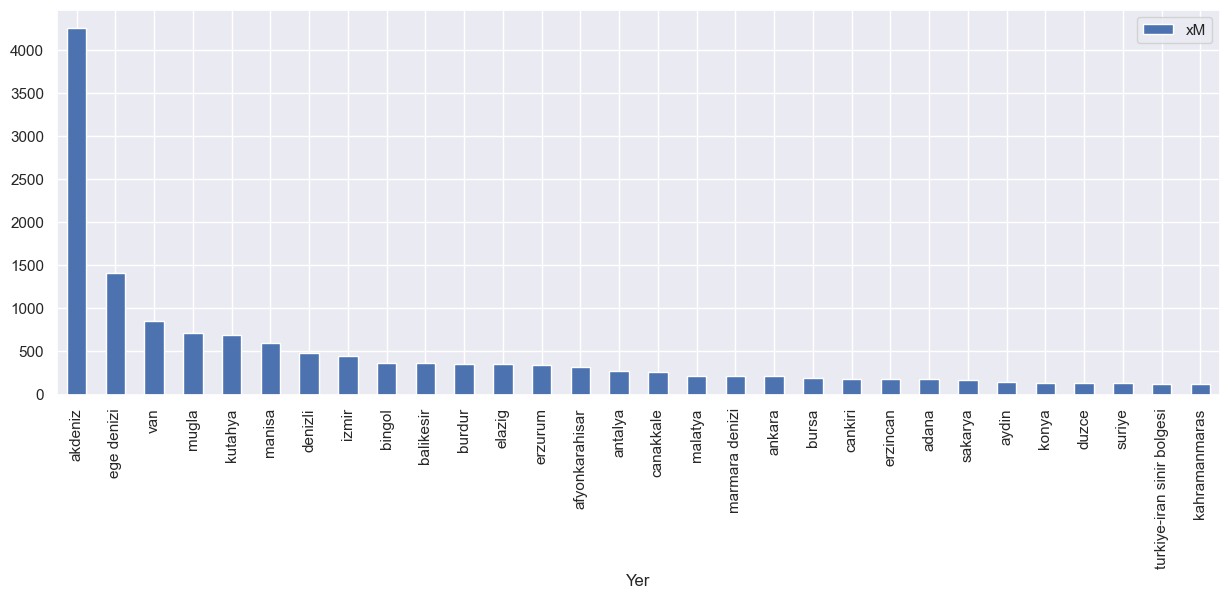

In [25]:
# en cok depremin oldugu yerler
grp_yer = df.groupby("Yer").agg({"xM": "count"})
grp_yer_sort = grp_yer.sort_values("xM", ascending=False)
top_N = 30 
top_xM_yer = grp_yer_sort.head(top_N)
top_xM_yer.plot(kind="bar", figsize=(15,5))

<Axes: title={'center': 'Yillara Gore Deprem Sayilari'}, xlabel='Olus zamani'>

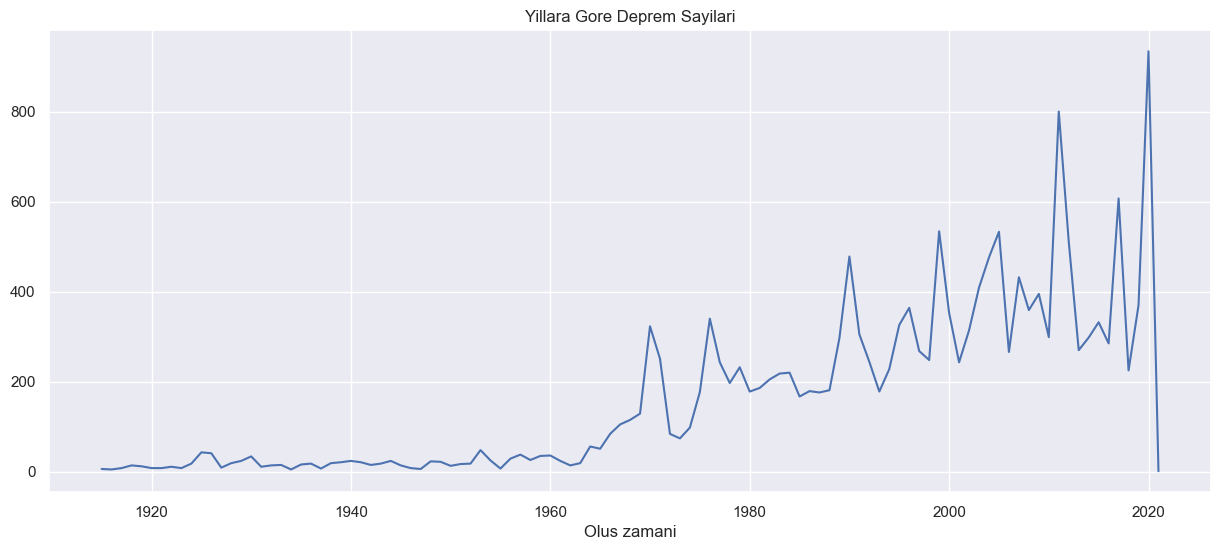

In [26]:
df.groupby(df["Olus zamani"].dt.year).size().plot.line(figsize=(15,6), title="Yillara Gore Deprem Sayilari")

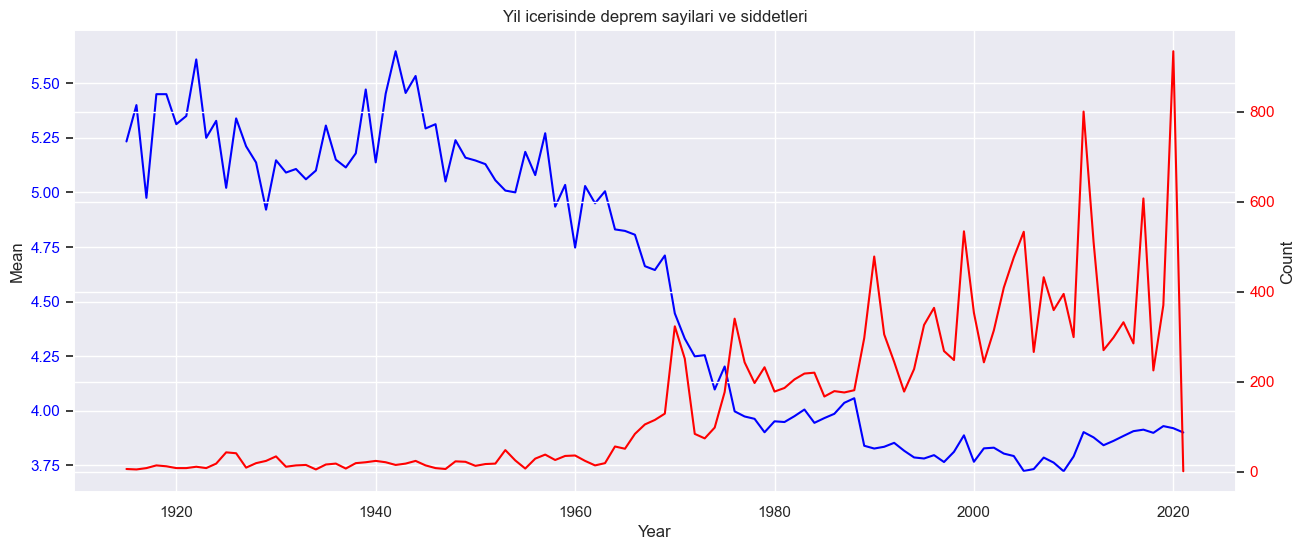

In [27]:
years_median = df.groupby(df["Olus zamani"].dt.year).agg({"xM": "mean"})
years_count = df.groupby(df["Olus zamani"].dt.year).agg({"xM": "count"})
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(years_median.index, years_median['xM'], label='Mean', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(years_count.index, years_count['xM'], label='Count', color='red')
ax2.set_ylabel('Count')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Yil icerisinde deprem sayilari ve siddetleri')

plt.show()


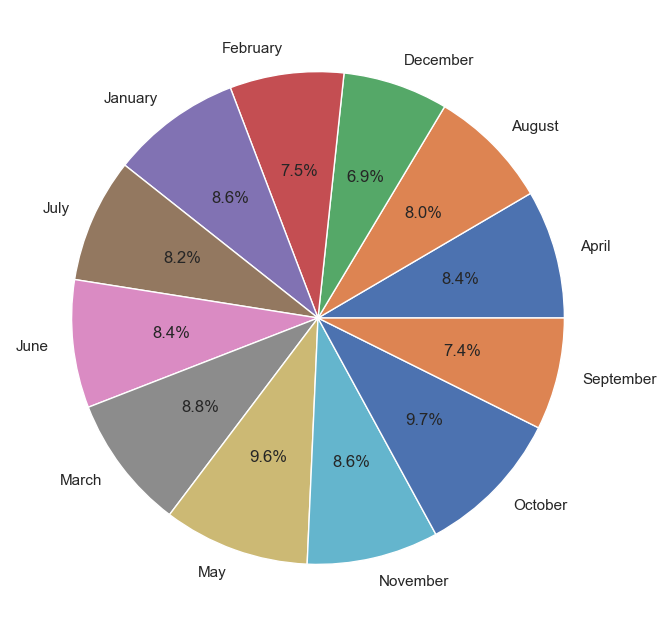

In [28]:
# aylara gore deprem sayilari
months = df.groupby(df["Olus zamani"].dt.month_name()).size().plot.pie(autopct='%1.1f%%')

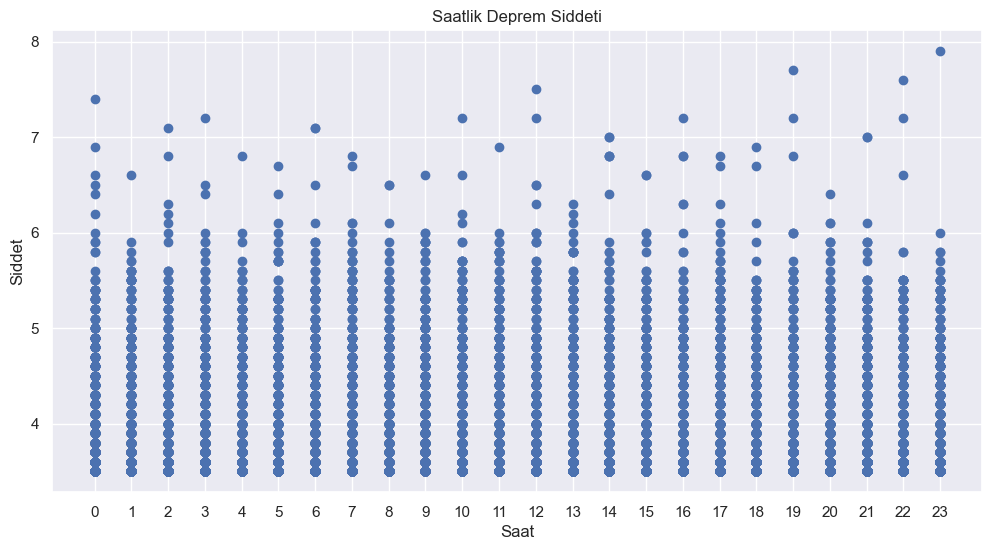

In [29]:
df['Hour'] = df['Olus zamani'].dt.hour
plt.figure(figsize=(12, 6))
plt.scatter(df['Hour'], df['xM'])
plt.title('Saatlik Deprem Siddeti')
plt.xlabel('Saat')
plt.ylabel('Siddet')
plt.xticks(range(24))
plt.show()

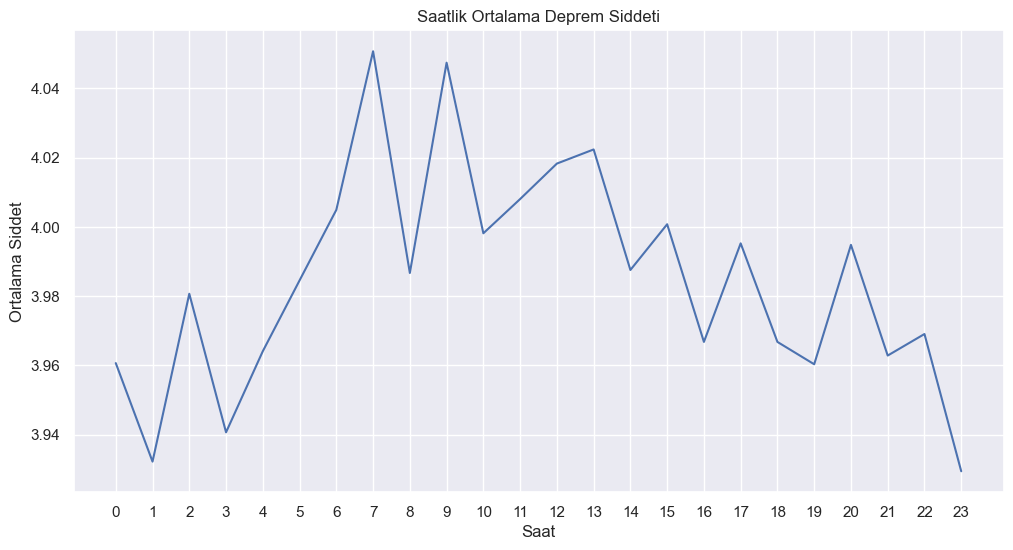

In [30]:
hour_xm = df.groupby('Hour')['xM'].mean()
plt.figure(figsize=(12, 6))
plt.plot(hour_xm.index, hour_xm)
plt.title('Saatlik Ortalama Deprem Siddeti')
plt.xlabel('Saat')
plt.ylabel('Ortalama Siddet')
plt.xticks(range(24))
plt.show()